In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import percentile
import matplotlib.pyplot as plt

In [3]:
train=pd.read_parquet('datasets/train.parquet', engine='fastparquet')


In [4]:
train.shape

(346479, 22)

In [5]:
train.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va


In [6]:
train.iloc[:,0:10].head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0


In [7]:
train.iloc[:,10:17].head(3)

,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,1,1,0,0,0,w/d in unit,detached garage
1,1,1,0,0,0,w/d in unit,carport
2,0,1,0,0,0,w/d hookups,off-street parking


In [8]:
train.iloc[:,17:].head(3)

,image_url,description,lat,long,state
0,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va


***Datos duplicados***

In [9]:
train.duplicated().sum()

0

In [10]:
train['description'].duplicated().sum()

91488

In [11]:
df = train.loc[train['description'].duplicated(keep=False),'description']
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[5]

(126930, 255782, 287091, 334698)

In [12]:
train.loc[[126930, 255782, 287091, 334698],['description','price']]

,description,price
126930,!!! For a limited time if you apply on the sam...,675
255782,!!! For a limited time if you apply on the sam...,675
287091,!!! For a limited time if you apply on the sam...,675
334698,!!! For a limited time if you apply on the sam...,675


In [13]:
train.drop_duplicates(subset='description', inplace=True)

In [14]:
train.shape

(254991, 22)

In [15]:
train['image_url'].duplicated().sum()

105628

In [16]:
df = train.loc[train['image_url'].duplicated(keep=False),'image_url']
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[5]

(118647, 132724)

In [17]:
train.loc[[118647, 132724],['description','price']]

,description,price
118647,CALL TO SCHEDULE A TOUR TODAY!! Riata Court i...,595
132724,CALL TO SCHEDULE A TOUR TODAY!! Riata Court i...,585


In [18]:
train.drop_duplicates(subset='image_url', inplace=True)

In [19]:
train.shape

(149363, 22)

In [20]:
df=train.loc[train.duplicated(subset=['lat','long'],keep=False)]
df.head(1)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.78,co


In [21]:
train.loc[(train['lat']==38.9137)&(train['long']==-104.78)].head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.78,co
3059,7044610910,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01010_kclotDj3Qz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.78,co
64538,7044619749,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1170,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00202_klYn6SCeDR...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.78,co


In [22]:
train.drop_duplicates(subset=['lat','long'],inplace=True, keep='last')

In [23]:
train.shape

(63527, 22)

***Outliers***

c:\Users\gualas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

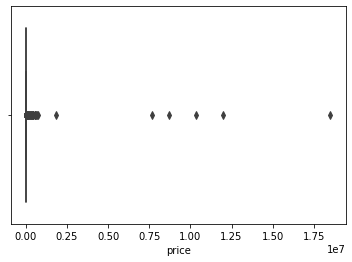

In [24]:
sns.boxplot(train['price'])

In [25]:
# Calcular los valores máximo y mínimo considerados como outliers
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Filtrar los valores fuera del rango (Q1 - 1.5 * IQR) y (Q3 + 1.5 * IQR)
train = train[~((train['price'] < (Q1 - 1.5 * IQR)) | (train['price'] > (Q3 + 1.5 * IQR)))]

c:\Users\gualas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

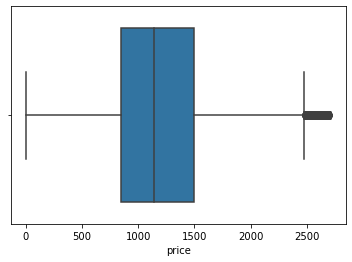

In [27]:
sns.boxplot(train['price'])

In [28]:
train.shape

(60031, 22)

***Columna Target***

In [29]:
promedio_precio=train['price'].mean()
promedio_precio

1222.3171028302045

In [30]:
train['target']=0

In [31]:
train.reset_index(inplace=True, drop=True)

In [32]:
train.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,target
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0
1,7047343269,https://worcester.craigslist.org/apa/d/worcest...,worcester / central MA,https://worcester.craigslist.org,1300,apartment,1150,3,1.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00x0x_cAeGUSUpyN...,NOTE: Available February 1st This is a COMPLE...,42.2470,-71.7872,ma,0
2,7045980336,https://maine.craigslist.org/apa/d/monmouth-mo...,maine,https://maine.craigslist.org,900,duplex,1200,3,1.0,0,...,0,0,w/d hookups,detached garage,https://images.craigslist.org/00W0W_exHN8f8cs5...,Located in a small town with great schools (ne...,44.2354,-70.0288,me,0


In [33]:
for i in range(len(train['price'])):
    if train['price'][i]>=promedio_precio:
        train['target'][i]=1
    else:
        pass

C:\Users\gualas\AppData\Local\Temp\ipykernel_11892\3526590561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'][i]=1


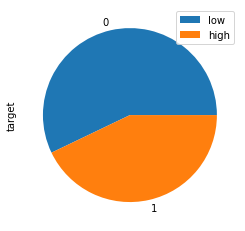

In [34]:
train['target'].value_counts().plot(kind = 'pie')
plt.legend(['low', 'high'])
plt.show()

In [35]:
train.isna().sum()#tomaremos los valores nulos de opcion a lavanderia y estacionamiento, como que el inmueble no lo posee
                  #y eliminaremos el inmueble sin ubicacion 

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7882
parking_options            13140
image_url                      0
description                    0
lat                            1
long                           1
state                          0
target                         0
dtype: int64

In [36]:
train.fillna({'laundry_options':'', 'parking_options':''}, inplace=True)
train.dropna(subset=['lat', 'long'], how='all',inplace=True)

In [37]:
train.shape

(60030, 23)

Eliminacion de columnas que no aportan

In [38]:
df = train.drop(columns=["id","url","region_url","image_url","description"])

In [42]:
df.head(10)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,id,1
1,worcester / central MA,1300,apartment,1150,3,1.0,1,1,1,0,0,0,w/d in unit,off-street parking,42.2470,-71.7872,ma,1
2,maine,900,duplex,1200,3,1.0,0,0,0,0,0,0,w/d hookups,detached garage,44.2354,-70.0288,me,0
3,new orleans,975,apartment,875,2,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,30.0165,-90.0655,la,0
4,augusta,959,apartment,1000,2,2.0,1,1,1,0,0,0,w/d hookups,,33.4761,-82.0725,ga,0
5,albany,950,condo,1508,5,2.5,1,1,1,0,0,0,,,42.3948,-73.9623,ga,0
6,tampa bay area,956,apartment,650,1,1.0,1,1,1,0,0,0,w/d in unit,off-street parking,27.9181,-82.7239,fl,0
7,inland empire,1899,apartment,971,2,2.0,0,0,1,0,0,0,,,34.0721,-117.5990,ca,1
8,hawaii,1450,duplex,600,2,1.0,0,0,0,0,0,0,,carport,21.4379,-158.1870,hi,1
9,st cloud,1250,townhouse,1522,2,1.5,0,0,0,0,0,0,w/d in unit,attached garage,45.7495,-94.2159,mn,1


In [39]:
df.isna().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
target                     0
dtype: int64

Convertimos a numeros los datos que se encuentran como string

In [43]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['region']=label_encoder.fit_transform(df['region'])
df['type']=label_encoder.fit_transform(df['type'])
df['laundry_options']=label_encoder.fit_transform(df['laundry_options'])
df['parking_options']=label_encoder.fit_transform(df['parking_options'])
df['state']=label_encoder.fit_transform(df['state'])


In [47]:
def plot_corre_heatmap(corr):
    plt.figure(figsize=(16,12))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t)
    plt.show()

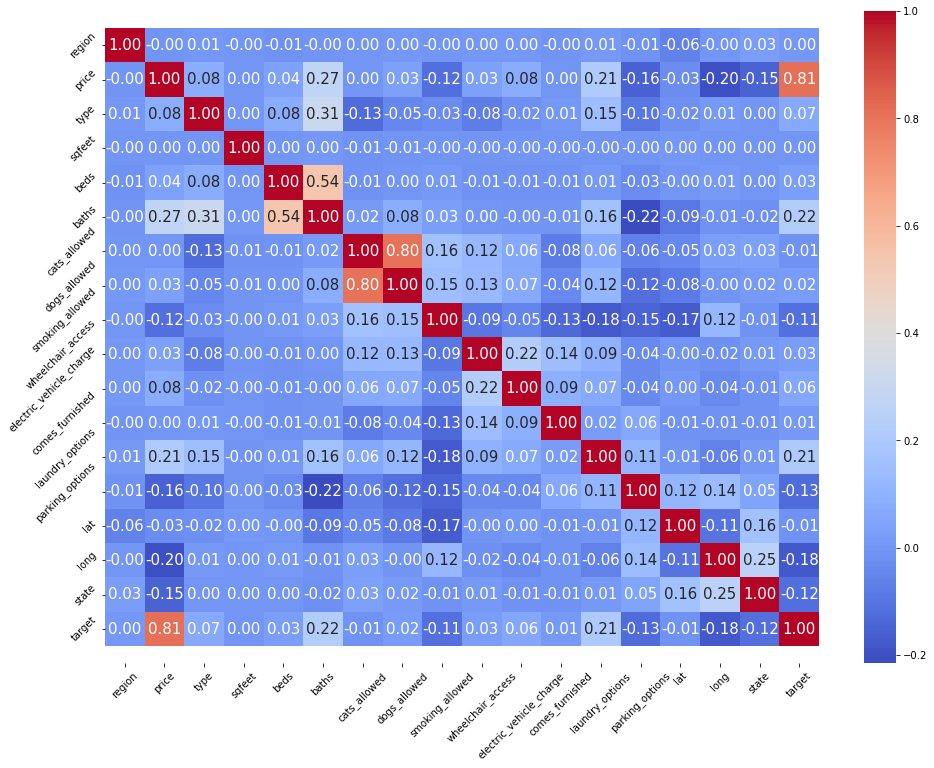

In [48]:
plot_corre_heatmap(df.corr())

In [49]:
df.to_csv('train_numerico.csv')